In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv(r'Credit_.csv')

In [ ]:
data.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_DLQ_NUM
0,59910150,0,49,1,0,1,2,1,5000.0,1,1,2
1,59910230,0,32,1,0,1,3,3,12000.0,1,1,1
2,59910525,0,52,1,0,1,4,0,9000.0,2,1,0
3,59910803,0,39,1,0,1,1,1,25000.0,1,1,3
4,59911781,0,30,1,0,0,0,0,12000.0,2,1,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AGREEMENT_RK       15223 non-null  int64  
 1   TARGET             15223 non-null  int64  
 2   AGE                15223 non-null  int64  
 3   SOCSTATUS_WORK_FL  15223 non-null  int64  
 4   SOCSTATUS_PENS_FL  15223 non-null  int64  
 5   GENDER             15223 non-null  int64  
 6   CHILD_TOTAL        15223 non-null  int64  
 7   DEPENDANTS         15223 non-null  int64  
 8   PERSONAL_INCOME    15223 non-null  float64
 9   LOAN_NUM_TOTAL     15223 non-null  int64  
 10  LOAN_NUM_CLOSED    15223 non-null  int64  
 11  LOAN_DLQ_NUM       15223 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 1.4 MB


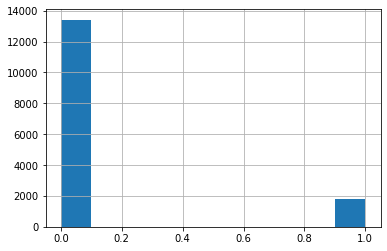

In [ ]:
data['TARGET'].hist()

In [ ]:
data['TARGET'].mean()

0.1190304145043684

In [ ]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, train_size=0.7, random_state=123)

In [ ]:
data.columns

Index(['AGREEMENT_RK', 'TARGET', 'AGE', 'SOCSTATUS_WORK_FL',
       'SOCSTATUS_PENS_FL', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS',
       'PERSONAL_INCOME', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED', 'LOAN_DLQ_NUM'],
      dtype='object')

In [ ]:
x = ['AGE', 'SOCSTATUS_WORK_FL',
       'SOCSTATUS_PENS_FL', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS',
       'PERSONAL_INCOME', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED', 'LOAN_DLQ_NUM']

X_train = data_train[x]
y_train = data_train[['TARGET']]

X_test = data_test[x]
y_test = data_test[['TARGET']]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [ ]:
print('Точность для обучающей выборки:', knn.score(X_train, y_train))
print('Точность для тестовой выборки:', knn.score(X_test, y_test))

Точность для обучающей выборки: 0.8856981981981982
Точность для тестовой выборки: 0.8701554631048829


In [ ]:
knn.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
knn.predict_proba(X_test)

array([[0.85714286, 0.14285714],
       [1.        , 0.        ],
       [0.85714286, 0.14285714],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.85714286, 0.14285714]])

In [ ]:
from sklearn.metrics import  confusion_matrix

In [ ]:
confusion_matrix(y_test, knn.predict(X_test))

array([[3963,   45],
       [ 548,   11]])

In [ ]:
confusion_matrix(y_test, knn.predict(X_test), normalize='all')

array([[0.86774688, 0.0098533 ],
       [0.11999124, 0.00240858]])

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
precision_score(y_test, knn.predict(X_test))

0.19642857142857142

In [ ]:
recall_score(y_test, knn.predict(X_test))

0.01967799642218247